## Exploratory Data Analysis (EDA) and Preprocessing

### Workflow
- Load the processed dataset.
- Descriptive analysis
- Data visualization.
- Data cleaning (handling missing values, outliers).
- Feature scaling & transformation.


In [197]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0 # set the hash seed for numpy generated random numbers

#### load datasets

In [198]:
#load the processed dataset
df = pd.read_csv("../processed-data/extracted-data.csv")

### Dataset overview

In [199]:
# display the number of rows and columns
print("Dataset Shape:", df.shape)
# display column names
print("Dataset Columns:")
df.columns

Dataset Shape: (206360, 17)
Dataset Columns:


Index(['Time', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
       'Patient_id', 'Task', 'Device_Location', 'Age', 'Height', 'Weight',
       'Gender', 'Condition', 'Age_At_Diagnosis', 'Handedness'],
      dtype='object')

In [200]:
#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Time                0
Accel_X             0
Accel_Y             0
Accel_Z             0
Gyro_X              0
Gyro_Y              0
Gyro_Z              0
Patient_id          0
Task                0
Device_Location     0
Age                 0
Height              0
Weight              0
Gender              0
Condition           0
Age_At_Diagnosis    0
Handedness          0
dtype: int64


- Dataset has no missing value

In [201]:
# Check the distribution of classes/record names
print("Task Distribution:")
print(df['Task'].value_counts())


Task Distribution:
Task
CrossArms      18760
DrinkGlas      18760
Entrainment    18760
HoldWeight     18760
LiftHold       18760
PointFinger    18760
Relaxed        18760
RelaxedTask    18760
StretchHold    18760
TouchIndex     18760
TouchNose      18760
Name: count, dtype: int64


### Data Visualization

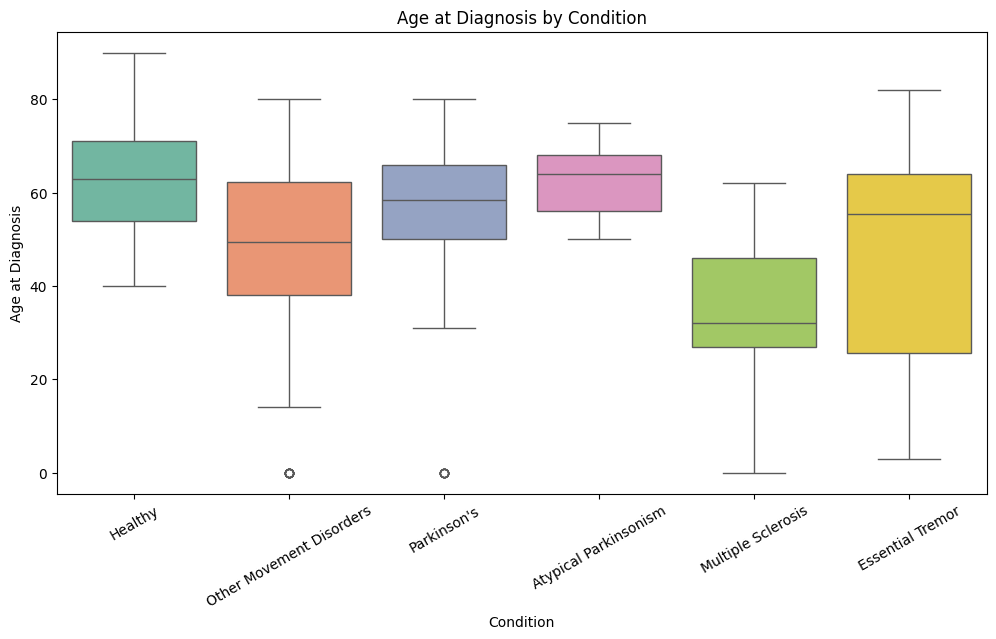

In [202]:

# Group by Patient_id and get the first value of each column
df_grouped = df.groupby("Patient_id").agg({
    "Age": "first", 
    "Gender": "first", 
    "Condition": "first",
    "Age_At_Diagnosis": "first"

}).reset_index()

# Plot Age at Diagnosis by Condition using Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grouped, x="Condition", y="Age_At_Diagnosis", hue="Condition", dodge=False, legend=False, palette="Set2")

# Add labels
plt.xlabel("Condition")
plt.ylabel("Age at Diagnosis")
plt.title("Age at Diagnosis by Condition")
plt.xticks(rotation=30)
plt.show()


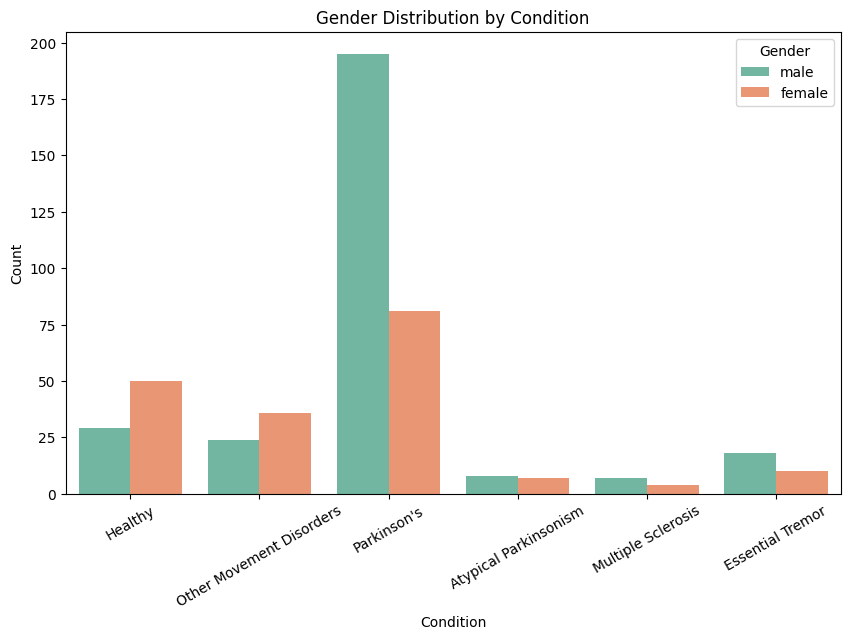

In [203]:
# Plot Gender Distribution by Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df_grouped, x="Condition", hue="Gender", palette="Set2")

# Add labels
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Gender Distribution by Condition")
plt.xticks(rotation=30)
plt.legend(title="Gender")
plt.show()


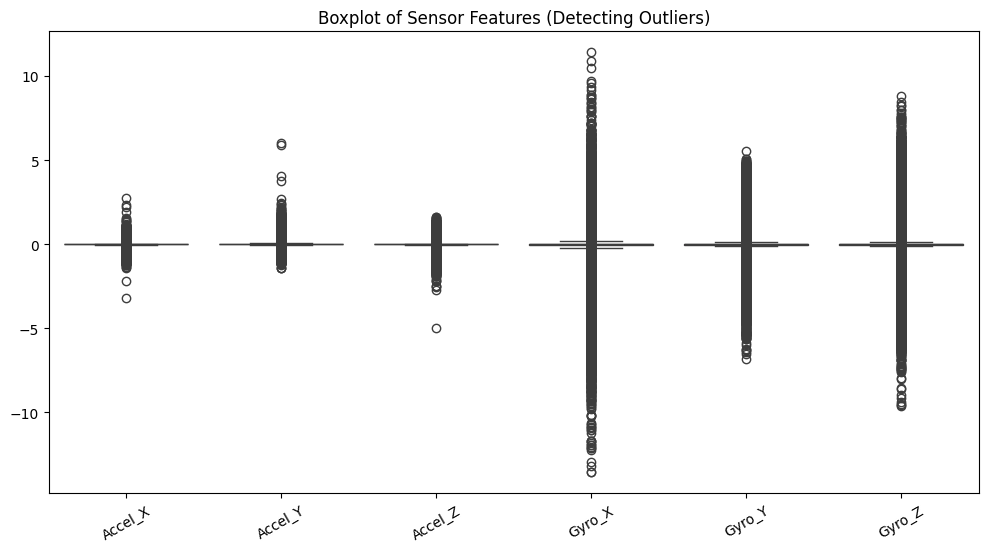

In [206]:
# Boxplot for detecting outliers

# define sensor columns
sensor_columns = ["Accel_X", "Accel_Y", "Accel_Z", "Gyro_X", "Gyro_Y", "Gyro_Z"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[sensor_columns]) # sensor data columns
plt.title("Boxplot of Sensor Features (Detecting Outliers)")
plt.xticks(rotation=30)
plt.show()

##### Remove Outliers if any

In [207]:
## Remove outliers using Z-score
# Compute Z-scores
z_scores = np.abs(zscore(df[sensor_columns]))

# Remove rows where Z-score > 3 (outliers)
df = df[(z_scores < 3).all(axis=1)]

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (187520, 17)


#### Nomalize numeric variables

In [208]:
# remove rows where Time == 0.0 (smartwatch vibrations)
df = df[df["Time"] > 0.0].copy()

# normalize elapsed time per (Patient_id, Task) group
scaler_time = MinMaxScaler()
df["Normalized_Time"] = df.groupby(["Patient_id", "Task"])["Time"].transform(lambda x: scaler_time.fit_transform(x.values.reshape(-1, 1)).flatten())


In [ ]:
# convert gender to binay values
df["Gender"] = df["Gender"].map({"male": 0, "female": 1})

In [ ]:
# convert handedness to binay values
df["Handedness"] = df["Handedness"].map({"right": 0, "left": 1})

In [213]:
# filter only 'Healthy' and 'Parkinson’s' conditions
df = df[df["Condition"].isin(["Healthy", "Parkinson's"])].copy()

# convert Condition to binary labels 
df["Condition"] = df["Condition"].map({"Healthy": 0, "Parkinson's": 1})


In [214]:
# drop unnecessary columns
columns_to_drop = ["Age"]
df.drop(columns=columns_to_drop, inplace=True)

##### Save cleaned data

In [215]:
# save the cleaned dataset
df.to_csv("../processed-data/cleaned-parkinsons-data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned-parkinsons-data.csv'.")


Cleaned dataset saved as 'cleaned-parkinsons-data.csv'.


##### Next steps
- Normalize features
- split datasets
- Train model
